# **OBJETIVO 1 DA SOLUÇÃO ECONOMED*


Do ponto de vista prático, utilizaremos uma base bastante conhecida contendo informações sobre os segurados (como idade, gênero, região de residência, entre outros).

Esses atributos são comumente usados para prever os custos médicos de um segurado, o que pode ser útil para companhias de seguros na precificação de apólices ou na identificação de segmentos de clientes com diferentes perfis de risco.


Esta base é composta pelos seguintes atributos:

- age: Refere-se à idade do segurado, representada em anos.
- sex: Indica o sexo do segurado, podendo ser 'male' ou 'female'.
- bmi: Corresponde ao Índice de Massa Corporal (IMC) do segurado, uma medida que relaciona o peso e a altura da pessoa, geralmente expressa em kg/m².
- children: Representa o número de filhos ou dependentes do segurado.
- smoker: Indica se o segurado é fumante ou não, podendo ser 'yes' ou 'no'.
-  region: Refere-se à região de residência do segurado, podendo ser 'northeast', 'northwest', 'southeast' ou 'southwest'.
- expenses: Corresponde aos custos médicos do segurado, em dólares.

In [27]:
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas para uso e visualização de dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import para divisão dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Imports para preparação de dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Import de modelo preditivo de regressão para comparar os resultados no final.
from sklearn.linear_model import LinearRegression

# Import de métricas para avaliação dos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
# Leitura do dataset
df = pd.read_csv("./insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [29]:
# Quais os tipos? Dados faltantes?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
# Quantos dados únicos
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [31]:
# Removendo duplicatas
df.drop_duplicates(inplace=True)
df.shape


(1337, 7)

In [32]:
# Convertendo dados "string" para "números"
df["genero"] = df["sex"].apply( lambda x: 0 if x == "male" else 1 )
df["fumante"] = df["smoker"].apply( lambda x: 1 if x == "yes" else 0 )

# OneHotEncoder da coluna "region"
aux = pd.get_dummies(df["region"], drop_first=True)
df_final = pd.concat([df, aux], axis=1)

# Remover colunas que já foram processadas
df_final.drop(columns=["sex", "smoker", "region"], inplace=True)
df_final

,age,bmi,children,expenses,genero,fumante,northwest,southeast,southwest
0,19,27.9,0,16884.92,1,1,False,False,True
1,18,33.8,1,1725.55,0,0,False,True,False
2,28,33.0,3,4449.46,0,0,False,True,False
3,33,22.7,0,21984.47,0,0,True,False,False
4,32,28.9,0,3866.86,0,0,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,0,True,False,False
1334,18,31.9,0,2205.98,1,0,False,False,False
1335,18,36.9,0,1629.83,1,0,False,True,False
1336,21,25.8,0,2007.95,1,0,False,False,True


In [33]:
# Separação de DADOS e LABEL
X = df_final.drop(columns=["expenses"])
y = df_final["expenses"]

# Dividindo dados para TREINO e TESTE
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Padronização dos dados
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [34]:
X_train, X_train_scaled

(      age   bmi  children  genero  fumante  northwest  southeast  southwest
 138    54  31.9         3       1        0      False       True      False
 381    55  30.7         0       0        1      False      False      False
 292    25  45.5         2       0        1      False       True      False
 1090   47  36.2         0       0        1      False       True      False
 893    47  38.9         2       0        1      False       True      False
 ...   ...   ...       ...     ...      ...        ...        ...        ...
 1096   51  35.0         2       1        1      False      False      False
 1131   27  45.9         2       0        0      False      False       True
 1295   20  22.0         1       0        0      False      False       True
 861    38  28.0         3       1        0      False      False       True
 1127   35  35.9         2       1        0      False       True      False
 
 [935 rows x 8 columns],
 array([[ 1.07135822,  0.21232198,  1.59987002, .

Agora vamos treinar nossos dados, vamos fazer dois modelos:

1.   modelo de regressão linear simples.
2.   modelo de rede neural




In [35]:
# funçao para facilitar o calculo das métricas

def metricas(X_tr_scaled, y_tr, y_ts, y_pr, model, id_modelo):
  y_pr_tr = model.predict(X_tr_scaled)

  # Erro quadrático médio
  print(f"MSE do TREINO ({id_modelo}): ", mean_squared_error(y_tr, y_pr_tr))
  print(f"MSE do TESTE  ({id_modelo}): ", mean_squared_error(y_ts, y_pr))

  # Erro absoluto médio
  print(f"MAE do TREINO ({id_modelo}): ", mean_absolute_error(y_tr, y_pr_tr))
  print(f"MAE do TESTE  ({id_modelo}): ", mean_absolute_error(y_ts, y_pr))

  # R²
  print(f"R² do TREINO ({id_modelo}): ", r2_score(y_tr, y_pr_tr))
  print(f"R² do TESTE  ({id_modelo}): ", r2_score(y_ts, y_pr))

In [36]:
# Treinando o modelo usando sklearn
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Fazendo as predições
y_pred = model_lr.predict(X_test_scaled)

In [37]:
# Metricas para regressão linear
metricas(X_train_scaled, y_train, y_test, y_pred, model_lr, "Reg Linear")

MSE do TREINO (Reg Linear):  35810116.96256572
MSE do TESTE  (Reg Linear):  38939165.630002595
MAE do TREINO (Reg Linear):  4165.7883312974745
MAE do TESTE  (Reg Linear):  4181.631594223738
R² do TREINO (Reg Linear):  0.7362844577541661
R² do TESTE  (Reg Linear):  0.7724422253182589


Vamos implementar um modelo de rede neural com Tensorflow

- criar o modelo de rede neural
- compilar o modelo
- treinar o modelo






In [38]:
import tensorflow as tf

# Cria o modelo de rede neural
# aqui devemos definir ao menos a quantidade de camadas, a quantidade de neuronios, o tipo de ativacao ...
model_rn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(428, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    tf.keras.layers.Dense(364, activation='relu',),
    tf.keras.layers.Dense(166, activation='relu',),
     tf.keras.layers.Dense(66, activation='relu',),
    tf.keras.layers.Dense(1)
])

# Compila o modelo
model_rn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Treina o modelo
historico_epochs = model_rn.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

# Fazendo as predições
y_pr = model_rn.predict(X_test_scaled)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 311531232.0000 - mae: 13127.0439 - val_loss: 293382016.0000 - val_mae: 12336.7471
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 295169152.0000 - mae: 12704.5303 - val_loss: 242277136.0000 - val_mae: 10457.6045
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 196846304.0000 - mae: 9523.5195 - val_loss: 77322176.0000 - val_mae: 6528.3057
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 66521636.0000 - mae: 6967.7046 - val_loss: 50317872.0000 - val_mae: 5026.9697
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39637364.0000 - mae: 4481.5718 - val_loss: 38308020.0000 - val_mae: 4510.9653
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34071400.0000 - mae: 4279.4468 - val_loss: 35464420.0000 - val_mae: 4159.4917
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29039144.0000 - mae: 3855.3962 - val_loss: 34233148.0000 - val_mae: 3935.4890
Epoch 8/100
24/24 ━━━━━━━━━━━━━

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loss      100 non-null    float64
 1   mae       100 non-null    float64
 2   val_loss  100 non-null    float64
 3   val_mae   100 non-null    float64
dtypes: float64(4)
memory usage: 3.3 KB


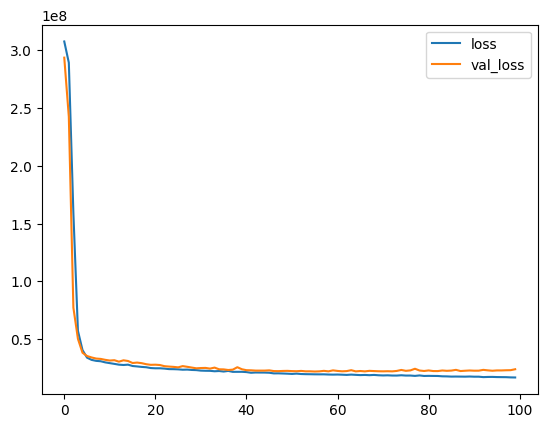

In [39]:
df_historico = pd.DataFrame(historico_epochs.history)
df_historico.info()

df_historico[['loss','val_loss']].plot()
plt.show();


In [40]:
# Metricas para regressão linear
metricas(X_train_scaled, y_train, y_test, y_pr, model_rn, "rede neural")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE do TREINO (rede neural):  18464410.09564239
MSE do TESTE  (rede neural):  25715434.83096802
MAE do TREINO (rede neural):  2300.8381209423046
MAE do TESTE  (rede neural):  2648.531518846199
R² do TREINO (rede neural):  0.8640230098742212
R² do TESTE  (rede neural):  0.8497207880438082
